# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


    



In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = base_url + "q=" + city + "&units=imperial" + "&appid=" + weather_api_key

weather_response = requests.get(query_url).json()     

    
print(json.dumps(weather_response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": -30.18,
        "lon": -50.21
    },
    "dt": 1594698038,
    "id": 3466165,
    "main": {
        "feels_like": 40.01,
        "grnd_level": 1021,
        "humidity": 69,
        "pressure": 1022,
        "sea_level": 1022,
        "temp": 50.27,
        "temp_max": 50.27,
        "temp_min": 50.27
    },
    "name": "Cidreira",
    "sys": {
        "country": "BR",
        "sunrise": 1594721731,
        "sunset": 1594759054
    },
    "timezone": -10800,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 250,
        "speed": 14.45
    }
}


In [4]:
name=[]
city_cloud =[]
country_name=[]
date=[]
humidity=[]
lat=[]
long=[]
max_temp=[]
wind_speed=[]
counter=0
units = 'imperial'

for city in cities:
    try:
        query_url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}'
        weather_response = requests.get(query_url).json()     

        name.append(weather_response["name"])
        city_cloud.append(weather_response["clouds"]["all"])
        country_name.append(weather_response["sys"]["country"])
        date.append(weather_response["dt"])
        humidity.append(weather_response["main"]["humidity"])
        lat.append(weather_response["coord"]["lat"])
        long.append(weather_response["coord"]["lon"])
        max_temp.append(weather_response["main"]["temp_max"])
        wind_speed.append(weather_response["wind"]["speed"])
        city_name = weather_response["name"]
        counter=counter+1
        print(f"processing record:{counter}|{city_name}")
            
    except:
        print("city not found")
    continue

processing record:1|Roald
processing record:2|Maltahöhe
processing record:3|Tuktoyaktuk
processing record:4|Atuona
processing record:5|Saint-Joseph
processing record:6|Tuatapere
processing record:7|Westport
processing record:8|Barrow
processing record:9|Castro
processing record:10|Mattru
processing record:11|La Ronge
processing record:12|Walvis Bay
processing record:13|Avarua
processing record:14|Shakawe
processing record:15|Hithadhoo
processing record:16|Mataura
processing record:17|Provideniya
processing record:18|Kapaa
processing record:19|Mumford
city not found
city not found
processing record:20|Punta Arenas
processing record:21|Sawtell
processing record:22|Jamestown
processing record:23|Saskylakh
processing record:24|Vikulovo
processing record:25|Rikitea
processing record:26|New Norfolk
processing record:27|São José da Coroa Grande
city not found
processing record:28|Loandjili
city not found
processing record:29|Dhārchula
processing record:30|Saint George
processing record:31|Ush

processing record:252|Jiwani
processing record:253|Teykovo
processing record:254|Talas
city not found
processing record:255|Yinchuan
processing record:256|Ourém
processing record:257|San Juan
processing record:258|Mountain Home
processing record:259|Worland
processing record:260|Grootfontein
processing record:261|Byron Bay
processing record:262|Te Anau
processing record:263|Lagoa
processing record:264|Verín
processing record:265|High Level
processing record:266|Oranjemund
processing record:267|Maningrida
processing record:268|Adrar
processing record:269|Hobyo
processing record:270|Nuuk
processing record:271|Kokopo
processing record:272|Fortuna
processing record:273|Puerto Colombia
processing record:274|Tadine
processing record:275|Tsimmerbude
processing record:276|Palana
city not found
processing record:277|Qingyuan
processing record:278|Rājmahal
processing record:279|Butembo
processing record:280|Lüderitz
city not found
processing record:281|Gīdam
processing record:282|Kawalu
processi

processing record:507|Namatanai
processing record:508|Conde
processing record:509|Sorata
processing record:510|La Rioja
processing record:511|Sitka
processing record:512|Río Esteban
processing record:513|Fayetteville
processing record:514|Severo-Kuril'sk
processing record:515|Miramar
processing record:516|Slobodskoy
processing record:517|Proletariy
processing record:518|Kerman
processing record:519|Launceston
processing record:520|Liwale
processing record:521|Kumluca
processing record:522|Abu Samrah
processing record:523|Chernyshevskiy
processing record:524|Mandalgovi
processing record:525|Hede
processing record:526|Marzuq
processing record:527|Camabatela
processing record:528|Novy Urengoy
processing record:529|Zhezkazgan
processing record:530|Alekseyevsk
processing record:531|Jizan
processing record:532|Cayenne
processing record:533|Peterhead
processing record:534|Sakhipur
city not found
city not found
processing record:535|São Miguel do Araguaia
processing record:536|Opuwo
city not f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Convert to DataFrame 
                             
city_data = pd.DataFrame({"City":name,"Cloudiness":city_cloud,"Country":country_name,"Date":date,"Humidity":humidity,
                        "Latitude":lat,"Longitude":long,"Max Temp":max_temp, "Wind Speed":wind_speed})

city_data.to_csv("cities.csv")
city_data
                        

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Roald,100,NO,1594698246,87,62.58,6.13,53.60,3.36
1,Maltahöhe,0,NA,1594698246,87,-24.83,16.98,34.36,3.67
2,Tuktoyaktuk,20,CA,1594698247,52,69.45,-133.04,64.40,5.82
3,Atuona,44,PF,1594698120,78,-9.80,-139.03,79.36,16.46
4,Saint-Joseph,37,RE,1594698100,68,-21.37,55.62,66.20,4.70
...,...,...,...,...,...,...,...,...,...
554,Gogrial,45,SS,1594698371,89,8.53,28.10,71.83,3.29
555,Rjukan,100,NO,1594698371,99,59.88,8.59,54.00,5.01
556,Jacareacanga,82,BR,1594698371,90,-6.22,-57.75,73.49,0.07
557,Menongue,0,AO,1594698372,57,-14.66,17.69,43.39,2.77


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
#  Get the indices of cities that have humidity over 100%.
humidity_over_100 = city_data["Humidity"]>100
new_df = city_data[humidity_over_100]
new_df

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed


In [24]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data[city_data["Humidity"]<100]
clean_city_data

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Roald,100,NO,1594698246,87,62.58,6.13,53.60,3.36
1,Maltahöhe,0,NA,1594698246,87,-24.83,16.98,34.36,3.67
2,Tuktoyaktuk,20,CA,1594698247,52,69.45,-133.04,64.40,5.82
3,Atuona,44,PF,1594698120,78,-9.80,-139.03,79.36,16.46
4,Saint-Joseph,37,RE,1594698100,68,-21.37,55.62,66.20,4.70
...,...,...,...,...,...,...,...,...,...
554,Gogrial,45,SS,1594698371,89,8.53,28.10,71.83,3.29
555,Rjukan,100,NO,1594698371,99,59.88,8.59,54.00,5.01
556,Jacareacanga,82,BR,1594698371,90,-6.22,-57.75,73.49,0.07
557,Menongue,0,AO,1594698372,57,-14.66,17.69,43.39,2.77


In [42]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
clean_city_data.to_csv("clean_city_data.csv")



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

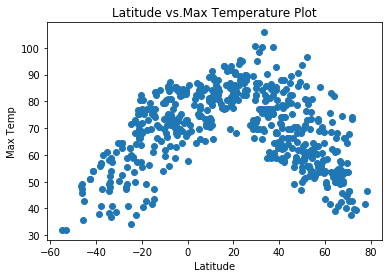

In [26]:
plt.scatter(clean_city_data['Latitude'], clean_city_data['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs.Max Temperature Plot')
plt.savefig("Fig1.png")

#Based on the Plot, it appears that the temperature rises near the equator

## Latitude vs. Humidity Plot

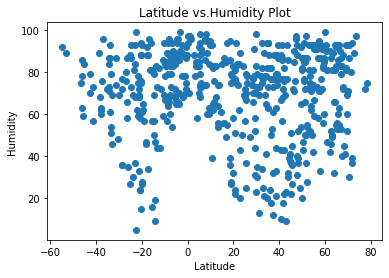

In [27]:
plt.scatter(clean_city_data['Latitude'], clean_city_data['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs.Humidity Plot')
plt.savefig("Fig2.png")

#Based on the plot, theree seems to be not much correlation between latitude and humidity

## Latitude vs. Cloudiness Plot

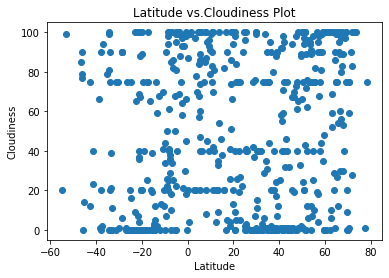

In [28]:
plt.scatter(clean_city_data['Latitude'], clean_city_data['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs.Cloudiness Plot')
plt.savefig("Fig3.png")

#based on the plot there seems to be no correlation between latitude and cloudiness

## Latitude vs. Wind Speed Plot

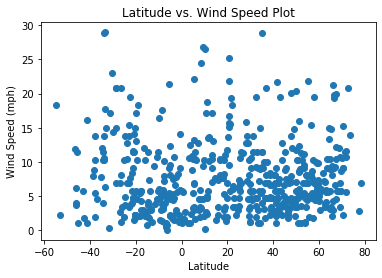

In [29]:
plt.scatter(clean_city_data['Latitude'], clean_city_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed Plot')
plt.savefig("Fig4.png")

#based on the plot there seems to be not much correlation between latitude vs. wind speed

## Linear Regression

In [30]:
# OPTIONAL: Create a function to create Linear Regression plots
def lin_reg(x_values,y_values, x_name, y_name):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(f"{x_name}")
    plt.ylabel(f"{y_name}")
    plt.title(f"{x_name} vs. {y_name}" )
    return print(f"The r-squared is: {rvalue**2}")
#     plt.annotate(line_eq,(6,10),fontsize=15,color="red")


In [31]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = clean_city_data[clean_city_data["Latitude"]>0]
southern_df = clean_city_data[clean_city_data["Latitude"]<0]

northern_df

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Roald,100,NO,1594698246,87,62.58,6.13,53.60,3.36
2,Tuktoyaktuk,20,CA,1594698247,52,69.45,-133.04,64.40,5.82
6,Westport,40,US,1594698152,57,41.14,-73.36,78.80,9.17
7,Barrow,90,US,1594698027,80,71.29,-156.79,37.40,11.41
9,Mattru,100,SL,1594698248,96,7.62,-11.83,73.26,2.93
...,...,...,...,...,...,...,...,...,...
552,Yatou,80,CN,1594698161,61,37.15,122.38,75.78,10.04
553,Fendou,0,CN,1594698370,51,45.20,130.92,79.38,4.29
554,Gogrial,45,SS,1594698371,89,8.53,28.10,71.83,3.29
555,Rjukan,100,NO,1594698371,99,59.88,8.59,54.00,5.01


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4274506515398963


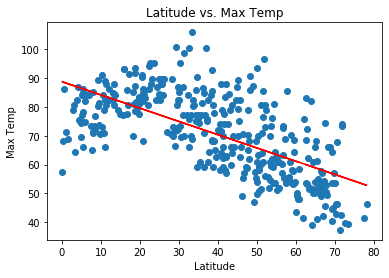

In [32]:
lin_reg(northern_df["Latitude"], northern_df["Max Temp"], "Latitude", "Max Temp")
plt.savefig("Fig5.png")

#There is correlation between latitude and max temperature in the northern hemisphere (linear)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5246677434301394


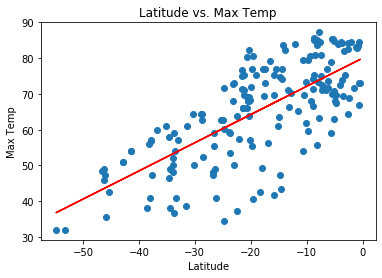

In [33]:
lin_reg(southern_df["Latitude"], southern_df["Max Temp"], "Latitude", "Max Temp")
plt.savefig("Fig6.png")

#There is correlation between latitude and max temperature in the southern hemisphere (linear)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.002513776532642733


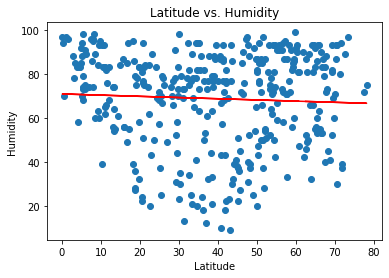

In [34]:
lin_reg(northern_df["Latitude"], northern_df["Humidity"], "Latitude", "Humidity")
plt.savefig("Fig7.png")

#There seems to be no correlation between latitude and humidity in the northern hempispher

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.016107251423314175


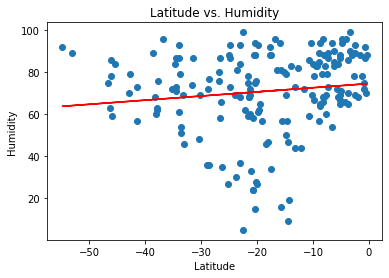

In [35]:
lin_reg(southern_df["Latitude"], southern_df["Humidity"], "Latitude", "Humidity")
plt.savefig("Fig8.png")

#There seems to be no correlation between latitude and humidity in the southern hempispher

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0028741018430018164


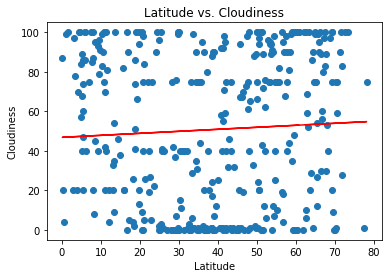

In [36]:
lin_reg(northern_df["Latitude"], northern_df["Cloudiness"], "Latitude", "Cloudiness")
plt.savefig("Fig9.png")

#There seems to be no correlation between latitude and cloudiness in the northern hempispher


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.013655133829678362


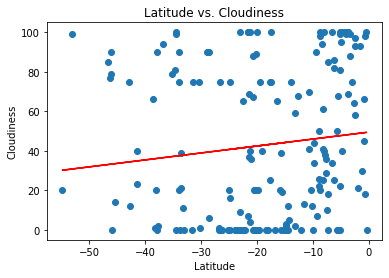

In [37]:
lin_reg(southern_df["Latitude"], southern_df["Cloudiness"], "Latitude", "Cloudiness")
plt.savefig("Fig10.png")

#There seems to be no correlation between latitude and cloudiness in the southern hempispher


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 8.658272350464984e-06


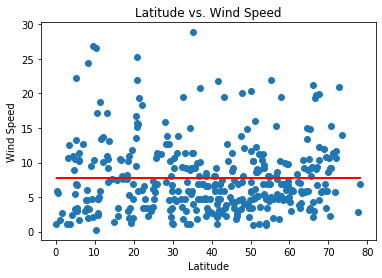

In [38]:
lin_reg(northern_df["Latitude"], northern_df["Wind Speed"], "Latitude", "Wind Speed")
plt.savefig("Fig11.png")

#There seems to be no correlation between latitude and w in the northern hempispher


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08424805259998022


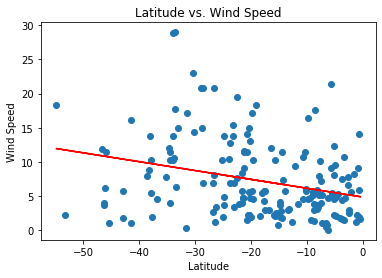

In [39]:
lin_reg(southern_df["Latitude"], southern_df["Wind Speed"], "Latitude", "Wind Speed")
plt.savefig("Fig12.png")
